In [236]:
from ephesus.data import get_data_csv
from ephesus.sentence import return_label, load_model
import spacy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import string
import re
import datetime
from ephesus.timedate import Date

# PREWORK

## Exploration

In [2]:
data = get_data_csv()

In [3]:
data.columns

Index(['translation', 'TreatmentDetected_1', 'NGAP_1', 'Cotation_1', 'Hour_1',
       'AldRelated_1', 'CareBeginDate_1', 'CareDuration_1',
       'CareDurationTypeEnum_1', 'CareOnPublicHoliday_1', 'CareLocation_1',
       'CareBeginHpName_1', 'ZoneName_1', 'IK_1'],
      dtype='object')

In [4]:
data['CareOnPublicHoliday_1'].unique()

array([ True, False])

In [5]:
df_extract = data.copy()[['translation','CareBeginDate_1','CareDuration_1','CareDurationTypeEnum_1']]
df_extract.head()

,translation,CareBeginDate_1,CareDuration_1,CareDurationTypeEnum_1
fichier,,,,
9f980dcf-b431-4e67-876f-2b8e288b7900_3b5f3f01-e244-4398-8388-19fb5058c9c1,Prise de sang faite le 19 février à domicile p...,2022-02-19T10:00:00,1,Days
2d035c4b-cdfa-4982-87dc-916fe07a0824_710f4bda-ba21-434f-883e-1b72df7ea27a,Pansement également refait le 23 mars par mylène.,2022-03-23T18:00:00,1,Days
b96ad235-2f4f-4236-9aa3-9df85dfcf7cb_ff1697c1-a01f-4eb5-a1c2-b95205dc389a,Pcr plus prise de sang fait à domicile à 11.,2022-03-12T11:00:00,1,Days
3e7ffb67-8872-4172-bf18-4fe338ecae3f_6e8b49e5-4213-45da-bad6-158592c7f731,Prise de sang et analyse stérile des urines à ...,2022-02-18T09:00:00,1,Days
2d035c4b-cdfa-4982-87dc-916fe07a0824_56c749ad-eed8-407a-ae9e-a17ebf420cf4,"Bonjour, merci de renouveler cette ordonnance ...",2022-03-18T16:00:00,2,Months


In [6]:
nlp = load_model("../models/model_full/model-best")

In [7]:
df_extract['extracted_label'] = df_extract['translation'].apply(lambda x: return_label(x, nlp))

In [8]:
def extract(prediction, label):
    for elm in prediction:
        if elm[1] == label:
            if elm[0] == np.nan:
                return np.nan
            else:
                return elm[0]  

In [9]:
df_extract['Duration'] = df_extract['extracted_label'].apply(lambda x: extract(x, "Duration"))

In [10]:
df_extract.head()

,translation,CareBeginDate_1,CareDuration_1,CareDurationTypeEnum_1,extracted_label,Duration
fichier,,,,,,
9f980dcf-b431-4e67-876f-2b8e288b7900_3b5f3f01-e244-4398-8388-19fb5058c9c1,Prise de sang faite le 19 février à domicile p...,2022-02-19T10:00:00,1,Days,"[(Prise de sang, Treatment), (le 19 février, D...",None
2d035c4b-cdfa-4982-87dc-916fe07a0824_710f4bda-ba21-434f-883e-1b72df7ea27a,Pansement également refait le 23 mars par mylène.,2022-03-23T18:00:00,1,Days,"[(Pansement, Treatment), (23 mars, Date)]",None
b96ad235-2f4f-4236-9aa3-9df85dfcf7cb_ff1697c1-a01f-4eb5-a1c2-b95205dc389a,Pcr plus prise de sang fait à domicile à 11.,2022-03-12T11:00:00,1,Days,"[(prise de sang, Treatment), (domicile, Locati...",None
3e7ffb67-8872-4172-bf18-4fe338ecae3f_6e8b49e5-4213-45da-bad6-158592c7f731,Prise de sang et analyse stérile des urines à ...,2022-02-18T09:00:00,1,Days,"[(Prise de sang, Treatment), (analyse stérile ...",None
2d035c4b-cdfa-4982-87dc-916fe07a0824_56c749ad-eed8-407a-ae9e-a17ebf420cf4,"Bonjour, merci de renouveler cette ordonnance ...",2022-03-18T16:00:00,2,Months,"[(pansement, Treatment), (bien marqué, Treatme...",None


In [11]:
df_extract.isna().sum()

translation                  0
CareBeginDate_1              0
CareDuration_1               0
CareDurationTypeEnum_1       0
extracted_label              0
Duration                  3655
dtype: int64

In [12]:
df_extract['Duration'][1]

In [13]:
df_not_null = df_extract.dropna()
df_not_null.head()

,translation,CareBeginDate_1,CareDuration_1,CareDurationTypeEnum_1,extracted_label,Duration
fichier,,,,,,
55d674cc-3389-4cf6-ab7c-1f1b9fa1b6ed_3e005951-47a1-4edb-ab50-ce602fe56c54,Renouvellement du bsc. D'une durée de un an à ...,2021-05-18T00:00:00,1,Days,"[(une durée de un an, Duration), (21 mai 2021,...",une durée de un an
2d035c4b-cdfa-4982-87dc-916fe07a0824_2dfdf4ab-fc95-4ec1-8e03-af502b95baf8,Ordonnance pour la réalisation de injection de...,2021-04-17T08:30:00,6,Days,"[(injection de kétoprofène, Treatment), (intra...",pour 6 jours
c619f0e1-7c22-4047-adb2-df4dec6643ba_8214d80f-0f7d-4e0d-9d4a-23294f9690b3,Soin débuté le vendredi 14 janvier 2022 jusqu'...,2022-01-14T12:30:00,4,Days,"[(Soin, Treatment), (vendredi 14 janvier 2022,...",jusqu'au lundi 17 janvier 2022
f0caa21b-c11d-40a3-98ec-e2df3d2b9cc4_7e5c146c-2faa-44ce-9228-ee5addf48580,"Soin débuté le 10 avril, à réaliser donc le s...",2021-04-10T08:00:00,15,Days,"[(Soin, Treatment), (10 avril, Date), (samedi ...",pendant 15 jours
c619f0e1-7c22-4047-adb2-df4dec6643ba_108cb1d9-6a25-4b7e-ba5a-390d464ed37c,Je ne vois pas les perfusions dans la dernière...,2022-01-19T06:30:00,1,Months,"[(fin du mois, Duration), (le mois de février,...",fin du mois


In [14]:
df_not_null['Duration'].unique()

array(['une durée de un an', 'pour 6 jours',
       "jusqu'au lundi 17 janvier 2022", 'pendant 15 jours',
       'fin du mois', "jusqu'au 8/12/2019", 'pour un an', '6 mois',
       'au 21 mars', 'jusque vendredi 25 février inclus',
       'pendant 3 mois', "jusqu'au 28 novembre", "jusqu'à",
       "Jusqu'au. 8 septembre", 'une durée de 3 mois', 'pendant 20 jours',
       'durée de 12 mois', 'pour 6 mois', '2 mois',
       'du 5 mars au 14 mars', 'une série de 10 mineuses',
       'pendant un mois', 'pendant 3 semaines', 'pendant 21 jours',
       'pendant donc 15 jours', 'pour 15 jours', 'cim si 86',
       'pendant  5 jours', '3 mois', 'ais 3 matins', 'durée de 15 jours',
       '6 fois', "jusqu'au.", 'pour 3 mois', 'pendant 6 mois',
       'pendant une semaine', 'pendant 3 jours', 'pendant 10 mois',
       'au premier avril', 'pendant 10 jours', 'pendant 49 jours',
       "jusqu'au dimanche 7", 'erreur de cotation', "jusqu'à 11h15",
       "jusqu'à vendredi", 'pendant 5 semaines', 'p

In [15]:
df_not_null.iloc[5,:]

translation               Pour monsieur Didier Nicolas, donc un passage ...
CareBeginDate_1                                         2019-11-24T10:30:00
CareDuration_1                                                           15
CareDurationTypeEnum_1                                                 Days
extracted_label           [(tous les jours, Frequency), (jusqu'au 8/12/2...
Duration                                                 jusqu'au 8/12/2019
Name: 9d42ce6f-8537-49a9-a121-c8ae1dc7cda8_3ffbf9cc-b9e4-405d-a038-fb4f9e036a72, dtype: object

In [16]:
df_not_null.iloc[5,5]

"jusqu'au 8/12/2019"

In [17]:
df_extract['CareDurationTypeEnum_1'].unique()

array(['Days', 'Months', 'Weeks', 'Acts', 'Rdvs'], dtype=object)

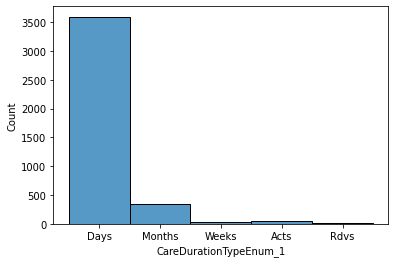

In [18]:
sns.histplot(df_extract['CareDurationTypeEnum_1']);

In [19]:
doc = nlp("prise de sang tous les 15 jours pour un an")
spacy.displacy.render(doc, style="ent",jupyter=True)

In [20]:
test = "prise de sang tous les 15 jours pendant 555 jours"

In [21]:
x = re.search('((?<=pour\s)|(?<=pendant\s))\d{1,3}\sjours|mois', test)

In [22]:
print(x.group().split())

['555', 'jours']


In [23]:
len(df_extract[df_extract['CareDuration_1']>1])

931

## Définition des REGEX principales 

In [24]:
def replace_un_une(sentence):
    if re.search('(un|une)\s(jour|mois|semaine|an)', sentence) is not None:
        sentence = sentence.replace("une","1")
        sentence = sentence.replace("un","1")
    return sentence

In [25]:
def duration_explo(sentence):
    liste_mois = '(janvier|février|mars|avril|mai|juin|juillet|août|septembre|octobre|novembre|décembre)'
    if sentence is None:
        return np.nan
    sentence = replace_un_une(sentence)
    sentence = sentence.replace('premier', '1')
    sentence = re.sub(' +', ' ', sentence).lower()
    if re.search('((?<=pour\s)|(?<=pendant\s))*\d{1,3}\s(jours|mois|semaines|an)', sentence) is not None:
        return "OK"
    if re.search('durée\sde\s\d{1,3}\s(jours|mois|an)', sentence) is not None:
        return "OK"
    if re.search("jusqu", sentence) is not None:
        return "OK"
    if re.search('du\s\d{1,2}\sau\s\d{1,2}\s'+liste_mois, sentence) is not None:
        return "OK"
    if re.search('du\s\d{1,2}\s'+liste_mois+'\sau\s\d{1,2}\s'+liste_mois, sentence) is not None:
        return "OK"
    

In [26]:
df_test = pd.DataFrame(df_not_null['Duration'].copy().unique(), columns=['extract'])
df_test["valid"] = np.nan
df_test

,extract,valid
0,une durée de un an,NaN
1,pour 6 jours,NaN
2,jusqu'au lundi 17 janvier 2022,NaN
3,pendant 15 jours,NaN
4,fin du mois,NaN
...,...,...
179,jusqu'au 10 février,NaN
180,jusqu'au 29 octobre 2000 vingt-et-un,NaN
181,pendant 30 jours,NaN
182,valable pour un an,NaN


In [27]:
df_test["valid"] = df_test["extract"].apply(lambda x: duration_explo(x))

In [28]:
(len(df_test) - df_test['valid'].isna().sum())/len(df_test)

0.717391304347826

In [29]:
df_test[~(df_test['valid'] == 'OK')]["extract"].unique()

array(['fin du mois', 'au 21 mars', 'une série de 10 mineuses',
       'cim si 86', 'ais 3 matins', '6 fois', 'pendant une semaine',
       'au premier avril', 'erreur de cotation', 'pour lundi 7 février',
       'pendant midi', 'du 14 mars', 'pour 8', 'du 25 mars', '6 2ais3',
       "pendant 10 fois d'affilée", '-moi au matin', 'pour un premier',
       'pour 12 fois', '19/04 au domicile', '6 octobre au matin',
       'pause de sonde de naso-Gastrique', 'pendant 2', '6 au matin soir',
       'pendant et on', '0 un 2022', 'du 11 décembre',
       'pour soins infirmiers', "puisqu'elle eu 90", "d'une oreille",
       '21/08/20 au soir', 'dizaine de jours', 'fait samedi 8',
       'pendant une', 'six mois', 'ais3 le soir', 'au 10 avril',
       'du 25 et on finit', 'le 25', 'et 18 février', 'fin le 25 février',
       '2 en cotation', 'fait une fois', 'ais 6.', 'pour un',
       'pendant 6 cycles plus', 'pendant 10. Fois', 'dans un premier',
       'du 19', 'valable 6', 'une série de perf

# REGEX

## Explicit duration

### Pour/pendant X jours/mois/semaines

In [53]:
test = 'pour 3 jours'

In [54]:
def regex_1(sentence):
    if re.search('((?<=pour\s)|(?<=pendant\s))*\d{1,3}\s(jours|mois|semaines|an)', sentence) is not None:
        x = re.search('((?<=pour\s)|(?<=pendant\s))*\d{1,3}\s(jours|mois|semaines|an)', sentence).group().split()
        #print(x)
        care_duration = x[0]
        #print(care_duration)
        care_duration_type = x[1]
        #print(care_duration_type)
        care_duration_type = care_duration_type.replace("jours", "Days")
        care_duration_type = care_duration_type.replace("mois", "Months")
        care_duration_type = care_duration_type.replace("semaines", "Weeks")
        care_duration_type = care_duration_type.replace("an", "Year")
        return care_duration, care_duration_type

In [32]:
regex_1(test)

('3', 'Days')

In [55]:
def test_1(sentence):
    liste_mois = '(janvier|février|mars|avril|mai|juin|juillet|août|septembre|octobre|novembre|décembre)'
    if sentence is None:
        return np.nan
    sentence = replace_un_une(sentence)
    sentence = sentence.replace('premier', '1')
    sentence = re.sub(' +', ' ', sentence).lower()
    if re.search('((?<=pour\s)|(?<=pendant\s))*\d{1,3}\s(jours|mois|semaines|an)', sentence) is not None:
        return regex_1(sentence)
    if re.search('durée\sde\s\d{1,3}\s(jours|mois|an)', sentence) is not None:
        return np.nan
    if re.search("jusqu", sentence) is not None:
        return np.nan
    if re.search('du\s\d{1,2}\sau\s\d{1,2}\s'+liste_mois, sentence) is not None:
        return np.nan
    if re.search('du\s\d{1,2}\s'+liste_mois+'\sau\s\d{1,2}\s'+liste_mois, sentence) is not None:
        return np.nan
    return np.nan

In [56]:
df_test = pd.DataFrame(df_not_null['Duration'].copy().unique(), columns=['extract'])
df_test["valid"] = np.nan
df_test

,extract,valid
0,une durée de un an,NaN
1,pour 6 jours,NaN
2,jusqu'au lundi 17 janvier 2022,NaN
3,pendant 15 jours,NaN
4,fin du mois,NaN
...,...,...
179,jusqu'au 10 février,NaN
180,jusqu'au 29 octobre 2000 vingt-et-un,NaN
181,pendant 30 jours,NaN
182,valable pour un an,NaN


In [57]:
df_test["valid"] = df_test["extract"].apply(lambda x: test_1(x))
df_test.dropna()

,extract,valid
0,une durée de un an,"(1, Year)"
1,pour 6 jours,"(6, Days)"
3,pendant 15 jours,"(15, Days)"
6,pour un an,"(1, Year)"
7,6 mois,"(6, Months)"
...,...,...
162,pendant 5 jours.,"(5, Days)"
171,une durée de 5 semaines,"(5, Weeks)"
174,pendant 10 jours.,"(10, Days)"
181,pendant 30 jours,"(30, Days)"


In [58]:
len(df_test.dropna())/len(df_test)

0.42934782608695654

In [59]:
df_test["valid"].unique()

array([('1', 'Year'), ('6', 'Days'), nan, ('15', 'Days'), ('6', 'Months'),
       ('3', 'Months'), ('20', 'Days'), ('12', 'Months'), ('2', 'Months'),
       ('1', 'Months'), ('3', 'Weeks'), ('21', 'Days'), ('5', 'Days'),
       ('3', 'Days'), ('10', 'Months'), ('10', 'Days'), ('49', 'Days'),
       ('5', 'Weeks'), ('35', 'Days'), ('2', 'Weeks'), ('8', 'Months'),
       ('7', 'Days'), ('12', 'Days'), ('5', 'Months'), ('28', 'Days'),
       ('4', 'Weeks'), ('8', 'Days'), ('14', 'Days'), ('4', 'Months'),
       ('6', 'Weeks'), ('60', 'Days'), ('2', 'Days'), ('31', 'Days'),
       ('30', 'Days')], dtype=object)

### une durée de x jours

In [38]:
test = 'sur une durée de 3 jours'

In [39]:
def regex_2(sentence):
    if re.search('durée\sde\s\d{1,3}\s(jours|mois|an)', sentence) is not None:
        temp = re.search('durée\sde\s\d{1,3}\s(jours|mois|an)', sentence).string
        x = re.search('\d{1,3}\s(jours|mois|an)', temp).group().split()
        #print(x)
        care_duration = x[0]
        #print(care_duration)
        care_duration_type = x[1]
        #print(care_duration_type)
        care_duration_type = care_duration_type.replace("jours", "Days")
        care_duration_type = care_duration_type.replace("mois", "Months")
        care_duration_type = care_duration_type.replace("semaines", "Weeks")
        care_duration_type = care_duration_type.replace("an", "Year")
        return care_duration, care_duration_type

In [40]:
regex_2(test)

('3', 'Days')

In [41]:
def test(sentence):
    liste_mois = '(janvier|février|mars|avril|mai|juin|juillet|août|septembre|octobre|novembre|décembre)'
    if sentence is None:
        return np.nan
    sentence = replace_un_une(sentence)
    sentence = sentence.replace('premier', '1')
    sentence = re.sub(' +', ' ', sentence).lower()
    if re.search('((?<=pour\s)|(?<=pendant\s))*\d{1,3}\s(jours|mois|semaines|an)', sentence) is not None:
        return regex_1(sentence)
    if re.search('durée\sde\s\d{1,3}\s(jours|mois|an)', sentence) is not None:
        return regex_2(sentence)
    if re.search("jusqu", sentence) is not None:
        return np.nan
    if re.search('du\s\d{1,2}\sau\s\d{1,2}\s'+liste_mois, sentence) is not None:
        return np.nan
    if re.search('du\s\d{1,2}\s'+liste_mois+'\sau\s\d{1,2}\s'+liste_mois, sentence) is not None:
        return np.nan

In [42]:
df_test = pd.DataFrame(df_not_null['Duration'].copy().unique(), columns=['extract'])
df_test["valid"] = df_test["extract"].apply(lambda x: test(x))
df_test.dropna()

,extract,valid
0,une durée de un an,"(1, Year)"
1,pour 6 jours,"(6, Days)"
3,pendant 15 jours,"(15, Days)"
6,pour un an,"(1, Year)"
7,6 mois,"(6, Months)"
...,...,...
162,pendant 5 jours.,"(5, Days)"
171,une durée de 5 semaines,"(5, Weeks)"
174,pendant 10 jours.,"(10, Days)"
181,pendant 30 jours,"(30, Days)"


In [43]:
len(df_test.dropna())/len(df_test)

0.42934782608695654

### Test une seule REGEX pour les deux

In [60]:
def explicit_duration(sentence):
    x = re.search('\d{1,3}\s(jours|mois|semaines|an)', sentence).group().split()
        #print(x)
    care_duration = x[0]
        #print(care_duration)
    care_duration_type = x[1]
        #print(care_duration_type)
    care_duration_type = care_duration_type.replace("jours", "Days")
    care_duration_type = care_duration_type.replace("mois", "Months")
    care_duration_type = care_duration_type.replace("semaines", "Weeks")
    care_duration_type = care_duration_type.replace("an", "Year")
    return care_duration, care_duration_type

In [62]:
def test(sentence):
    liste_mois = '(janvier|février|mars|avril|mai|juin|juillet|août|septembre|octobre|novembre|décembre)'
    if sentence is None:
        return np.nan
    sentence = replace_un_une(sentence)
    sentence = sentence.replace('premier', '1')
    sentence = re.sub(' +', ' ', sentence).lower()
    if re.search('\d{1,3}\s(jours|mois|semaines|an)', sentence) is not None:
        return explicit_duration(sentence)
    if re.search('du\s\d{1,2}\sau\s\d{1,2}\s'+liste_mois, sentence) is not None:
        return np.nan
    if re.search('du\s\d{1,2}\s'+liste_mois+'\sau\s\d{1,2}\s'+liste_mois, sentence) is not None:
        return np.nan

In [63]:
df_test = pd.DataFrame(df_not_null['Duration'].copy().unique(), columns=['extract'])
df_test["valid"] = df_test["extract"].apply(lambda x: test(x))
df_test.dropna()

,extract,valid
0,une durée de un an,"(1, Year)"
1,pour 6 jours,"(6, Days)"
3,pendant 15 jours,"(15, Days)"
6,pour un an,"(1, Year)"
7,6 mois,"(6, Months)"
...,...,...
162,pendant 5 jours.,"(5, Days)"
171,une durée de 5 semaines,"(5, Weeks)"
174,pendant 10 jours.,"(10, Days)"
181,pendant 30 jours,"(30, Days)"


In [64]:
len(df_test.dropna())/len(df_test)

0.42934782608695654

## Implicit duration

### Jusqu'au ...

In [74]:
test = "jusqu'au 10 juin"

In [75]:
month_dico = {'janvier':1,
             'février':2,
             'mars':3,
             'avril':4,
             'mai':5,
             'juin':6,
             'juillet':7,
             'août':8,
             'septembre':9,
             'octobre':10,
             'novembre':11,
             'décembre':12}

In [112]:
data

,translation,TreatmentDetected_1,NGAP_1,Cotation_1,Hour_1,AldRelated_1,CareBeginDate_1,CareDuration_1,CareDurationTypeEnum_1,CareOnPublicHoliday_1,CareLocation_1,CareBeginHpName_1,ZoneName_1,IK_1
fichier,,,,,,,,,,,,,,
9f980dcf-b431-4e67-876f-2b8e288b7900_3b5f3f01-e244-4398-8388-19fb5058c9c1,Prise de sang faite le 19 février à domicile p...,NaN,PSG,NaN,10:00:00,True,2022-02-19T10:00:00,1,Days,True,Domicile,Bouvet Pauline,NaN,"{'KilometersNumberPlain': None, 'KilometersNum..."
2d035c4b-cdfa-4982-87dc-916fe07a0824_710f4bda-ba21-434f-883e-1b72df7ea27a,Pansement également refait le 23 mars par mylène.,NaN,PSTA,NaN,18:00:00,True,2022-03-23T18:00:00,1,Days,True,Domicile,Scheuer Mylène,NaN,NaN
b96ad235-2f4f-4236-9aa3-9df85dfcf7cb_ff1697c1-a01f-4eb5-a1c2-b95205dc389a,Pcr plus prise de sang fait à domicile à 11.,NaN,PV19,NaN,11:00:00,False,2022-03-12T11:00:00,1,Days,True,Domicile,NaN,NaN,NaN
3e7ffb67-8872-4172-bf18-4fe338ecae3f_6e8b49e5-4213-45da-bad6-158592c7f731,Prise de sang et analyse stérile des urines à ...,NaN,PLVA,NaN,09:00:00,True,2022-02-18T09:00:00,1,Days,True,Domicile,NaN,NaN,NaN
2d035c4b-cdfa-4982-87dc-916fe07a0824_56c749ad-eed8-407a-ae9e-a17ebf420cf4,"Bonjour, merci de renouveler cette ordonnance ...",NaN,PLM,NaN,16:00:00,False,2022-03-18T16:00:00,2,Months,True,Domicile,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a5050600-95ef-43d8-a5fa-a57c791bf843_448853a4-f75e-403a-8fcb-8dfc18f0b4ec,Test antigénique réalisé cet après-midi à domi...,NaN,TAID19,NaN,14:00:00,False,2022-04-05T14:00:00,1,Days,True,Domicile,NaN,NaN,NaN
2d035c4b-cdfa-4982-87dc-916fe07a0824_4fb0c6a1-0562-496a-ae88-1adadec059a6,Réalisation d'une prise de sang chez monsieur ...,NaN,PSG,NaN,08:15:00,False,2022-02-24T08:15:00,1,Days,True,Domicile,NaN,NaN,NaN
b96ad235-2f4f-4236-9aa3-9df85dfcf7cb_b8a5877a-b8ce-4347-b294-3aa46efbcb34,Ordonnance pour la préparation du pilulier en ...,NaN,SSCP,NaN,17:00:00,True,2022-02-03T17:00:00,12,Months,True,Domicile,NaN,NaN,NaN


In [122]:
liste_mois = '(janvier|février|mars|avril|mai|juin|juillet|août|septembre|octobre|novembre|décembre)'

In [233]:
def implicit_duration_1(sentence, CareBeginDate=None):
    df = pd.DataFrame()
    end_date = re.search("(?<=jusqu\'au\s)(\w\s)*\d{1,2}\s"+liste_mois, sentence).group()
    if CareBeginDate == None:
        df["CareDuration"] = [np.nan]
        df["CareDurationType"] = [np.nan]
        df["CareEnd"] = [end_date]
        return df
    #transformation de end_date
    df_end_date = Date().transform_data(end_date)
    end_date_datetime = datetime.date(2022,df_end_date.iloc[0,2],df_end_date.iloc[0,1])
    #transformation de CareBeginDate
    df_start_date = Date().transform_data(CareBeginDate)
    start_date = datetime.date(2022,df_start_date.iloc[0,2],df_start_date.iloc[0,1])
    df["CareDuration"] = [(end_date_datetime - start_date).days]
    df["CareDurationType"] = ["Days"]
    df["CareEnd"] = [end_date]
    return df

In [234]:
implicit_duration_1("traitement jusqu'au 10 juin",CareBeginDate="3 juin")

,CareDuration,CareDurationType,CareEnd
0,7,Days,10 juin


In [235]:
implicit_duration_1("traitement jusqu'au 10 juin")

,CareDuration,CareDurationType,CareEnd
0,NaN,NaN,10 juin


### Du XX au XX mois

In [137]:
test = "du 6 juin au 15 juin"

In [142]:
re.search('(du\s)(\d{1,2})(\sjuin\s)(au\s)\d{1,2}\sjuin', test).group()

'du 6 juin au 15 juin'

In [ ]:
'((?<=pour\s)|(?<=pendant\s))*\d{1,3}\s(jours|mois|semaines|an)'